# Name: Ronit Kumar Kataria  (06451)
# Email: rk06451@st.habib.edu.pk
# HomeWork title: Homework Assignment 12: Time Series Analysis



In [125]:
from pylab import rcParams
import matplotlib
import statsmodels.api as sm
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")  # optional
plt.style.use('fivethirtyeight')  # optional
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import math


In [126]:
df = pd.read_csv('bitcoin-price.csv', parse_dates= ['Date'])
df = df.set_index('Date')
df.head()


,Price
Date,
2023-03-25,1775.87
2023-03-24,1743.95
2023-03-23,1749.80
2023-03-22,1815.60
2023-03-21,1739.70


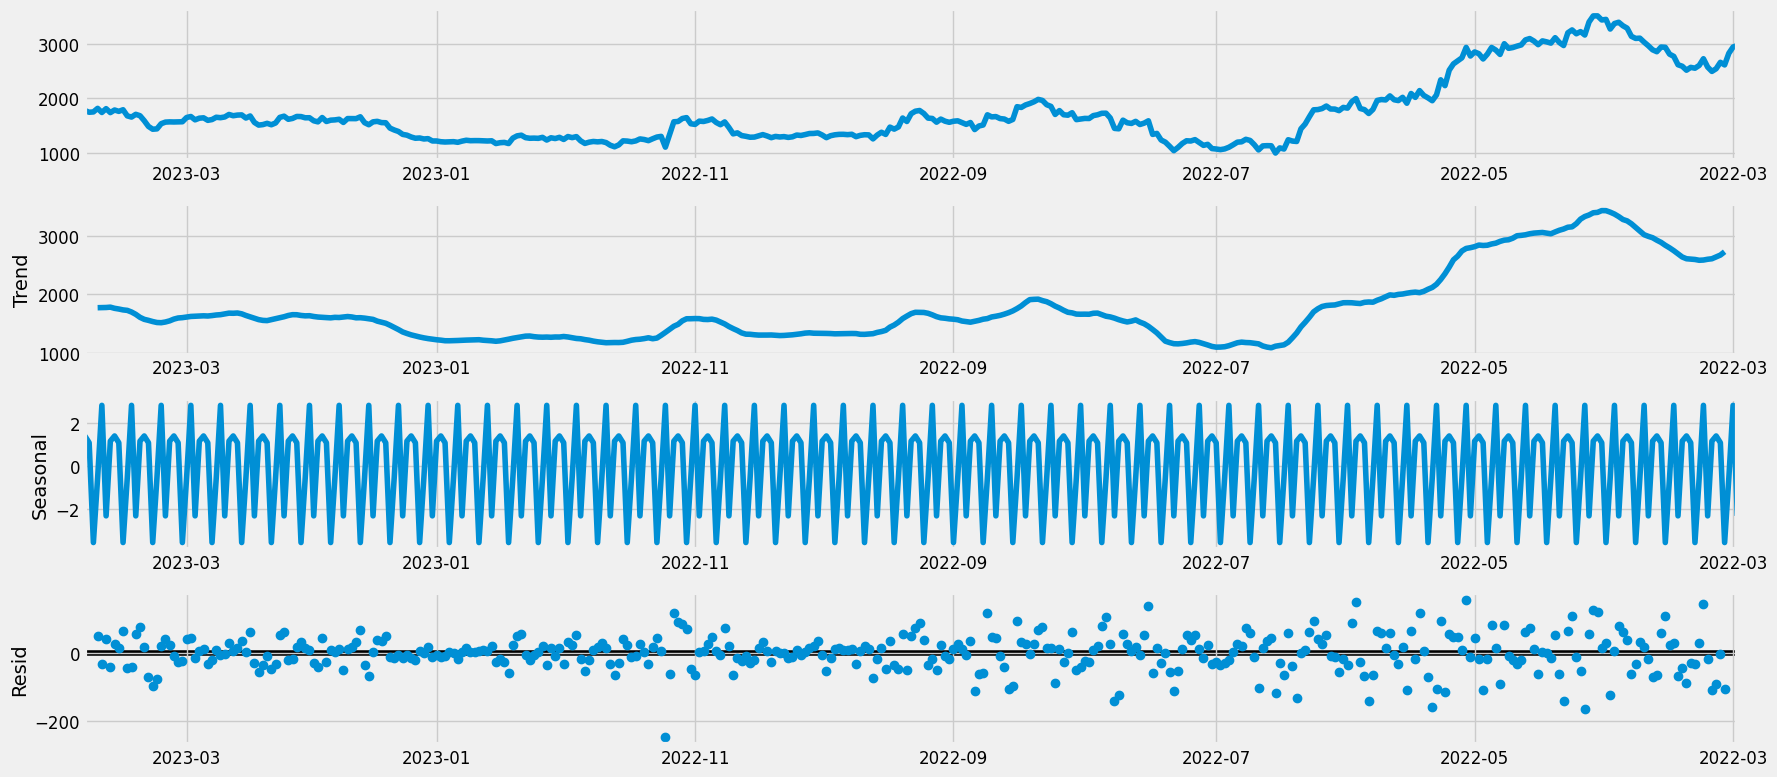

In [127]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
rcParams['figure.figsize'] = 18, 8
fig = decomposition.plot()
plt.show()


<h3>Analysis:</h3>
As the trend shows that the value of bitcoin is increasing with proper prograganda integerated with the seasonal market. The residual stills shows that there are some erros but analyzing it closely we can see that most of the values lies close to 0 which means the error is neglible. There are also not much residuals so it means that we can work on this data and can predict the future values of bitcoin.

In [128]:
df = df['Price'].resample('d').mean()


<h3> Question 3: </h3>
Split the data into train and test sets. Use all the data for year 2020 for training and
2021 for testing.

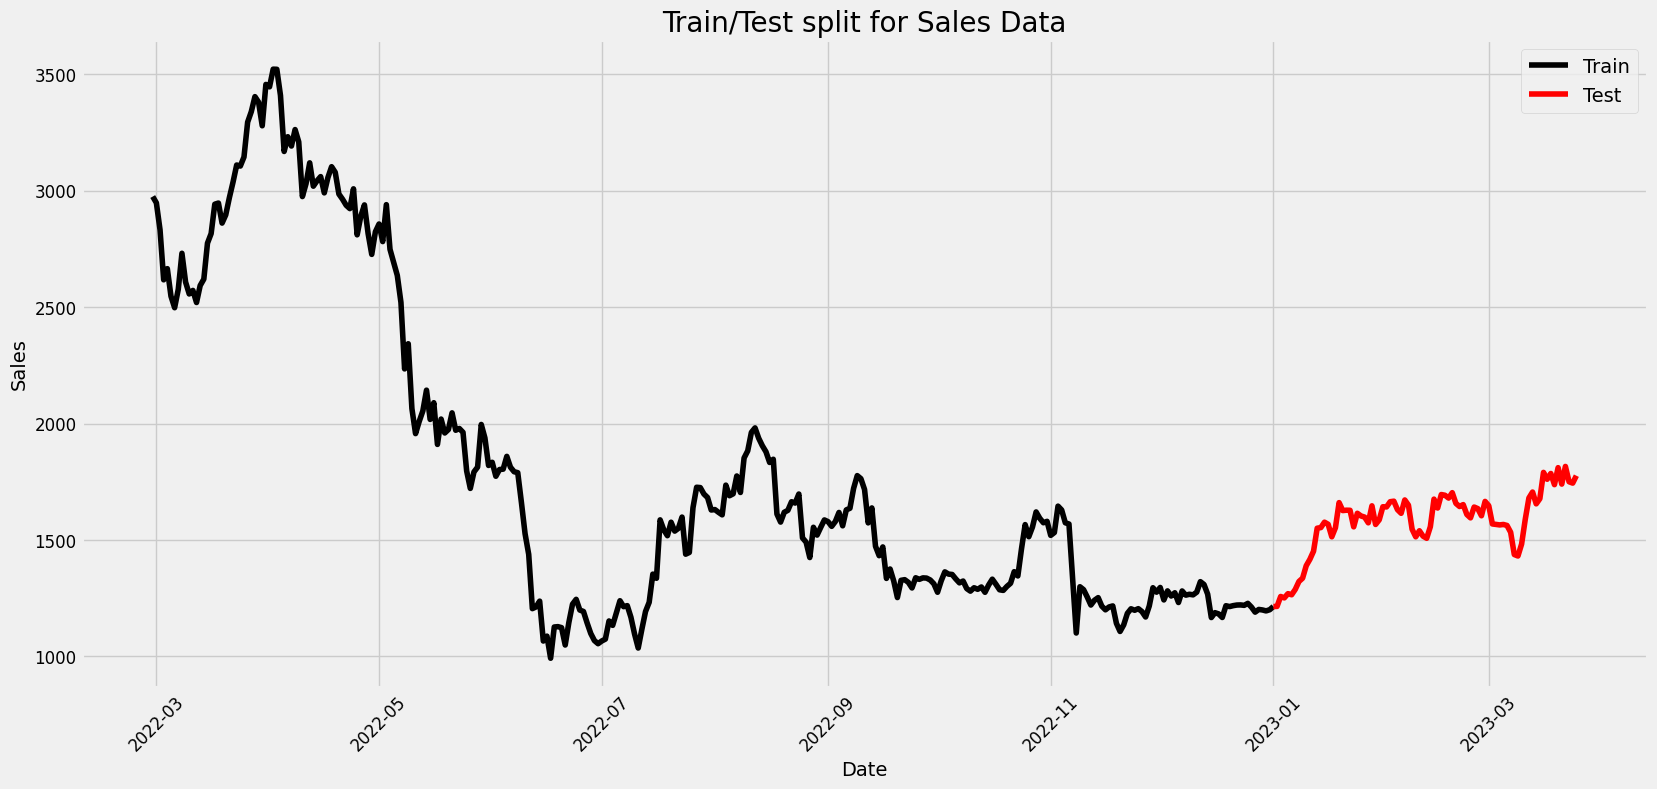

In [129]:
trainData = df[df.index <= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]
testData = df[df.index >= pd.to_datetime("2023-01-01", format='%Y-%m-%d')]

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()



<h3> Question 4: </h3>
Use ARIMA, visualize the results and report the RMSE


In [130]:
from statsmodels.tsa.arima.model import ARIMA

p = seasonlily, ( auto regressive as this allows us to incorporate the effect of past values into our model.) 


d = trend, ( differencing as this allows us to model any linear trend in our time series. amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series.  )

q = noise ( moving part of average as this allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.)

```python

In [131]:
trainData

Date
2022-02-28    2975.24
2022-03-01    2948.09
2022-03-02    2832.50
2022-03-03    2617.43
2022-03-04    2665.45
               ...   
2022-12-28    1201.10
2022-12-29    1198.93
2022-12-30    1194.86
2022-12-31    1199.96
2023-01-01    1213.76
Freq: D, Name: Price, Length: 308, dtype: float64

In [132]:
from sklearn.metrics import mean_squared_error
import numpy as np
def ArimaModel_best(p, d, q):
    ArimaModel = ARIMA(trainData, order=(p, d, q))
    ArimaModel = ArimaModel.fit()

    yPred = ArimaModel.get_forecast(len(testData.index))

    yPred_df = yPred.conf_int(alpha=0.05)
    yPred_df['Predictions'] = ArimaModel.predict(
        start=yPred_df.index[0], end=yPred_df.index[-1])

    yPred_df.index = testData.index
    y_pred_out = yPred_df["Predictions"]

    arma_rmse = np.sqrt(mean_squared_error(testData.values, y_pred_out))
    
    return arma_rmse, y_pred_out



Best RMSE 254.90466659854403 with combination of (2, 2, 2) 



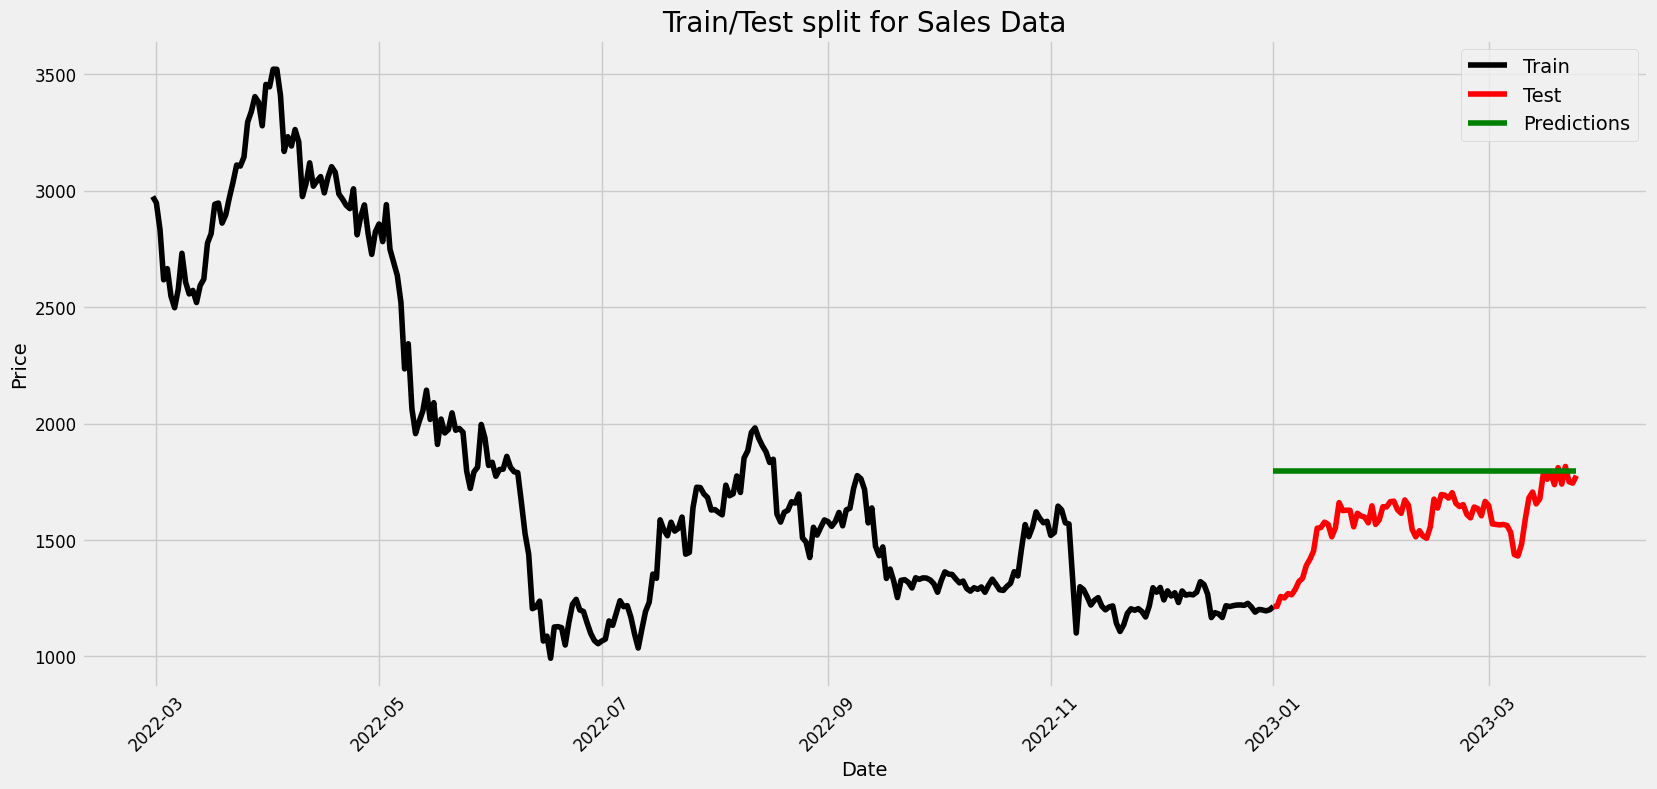

In [134]:
bestRMSE = math.inf
import itertools
nums = [0, 1, 2]
combinations = list(itertools.product(nums, repeat=3))
for i in combinations:

    result = ArimaModel_best(p = i[0], d = i[1], q= i[1])
    if result[0] < bestRMSE:
        bestRMSE = result[0]
        y_pred_out = result[1]
    
print(f'Best RMSE {bestRMSE} with combination of {i} \n')

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()




<h3> Question-5 </h3>
Use SARIMA, visualize the results and report the RMSE.

In [135]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def SarimaxModel_Best(param, param_seasonal):
    SarimaxModel = SARIMAX(trainData,order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
    SarimaxModel = SarimaxModel.fit()

    return SarimaxModel.aic



In [136]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(trainData,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue


<h3> Question-5 </h3>
Use SARIMA, visualize the results and report the RMSE.

In [137]:
# calling the model to check the best value of SariMax model
from sklearn.metrics import mean_squared_error
import numpy as np
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 18)
                for x in list(itertools.product(p, d, q))]

bestAIC = math.inf
bestpdq = []
bestSeaspdq = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            result = SarimaxModel_Best(param= param, param_seasonal= param_seasonal)
            if result < bestAIC:
                bestAIC = result
                bestpdq = param
                bestSeaspdq = param_seasonal


        except:
            continue
print('ARIMA{}x{}12 - AIC:{}'.format(bestpdq, bestSeaspdq, bestAIC))


ARIMA(0, 1, 1)x(0, 1, 1, 18)12 - AIC:3153.5027770934594


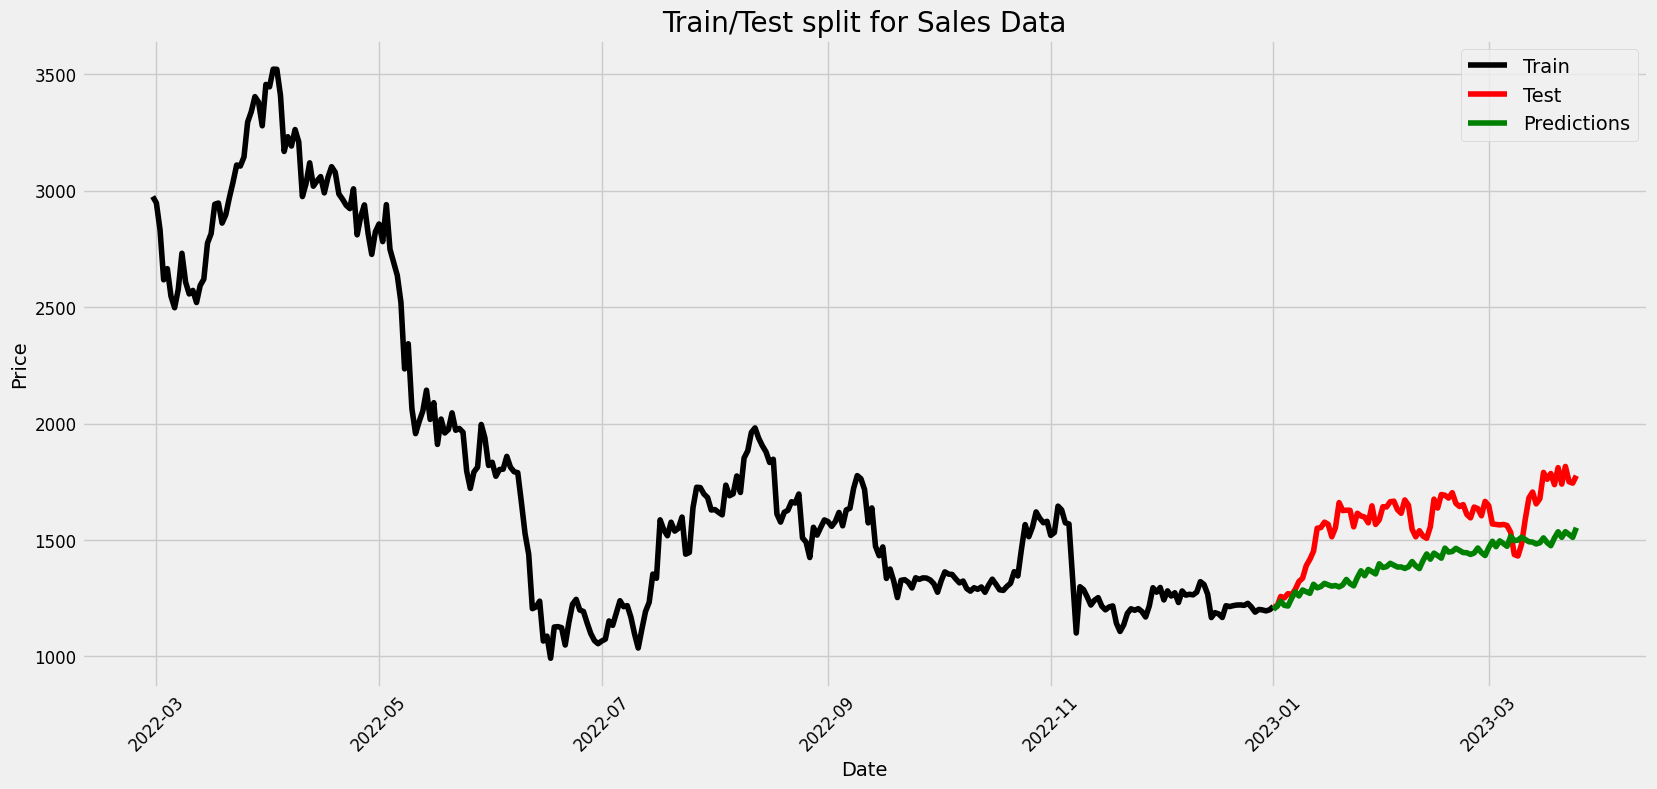

RMSE:  204.5774629588558


In [138]:


# with trial and error, I have got these values of pdq and seasonal_pdq

SARIMAXmodel = SARIMAX(trainData, order=[1,0,6], seasonal_order=[1,1,1,18])
SARIMAXmodel = SARIMAXmodel.fit()
y_pred = SARIMAXmodel.get_forecast(len(testData.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(
    start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = testData.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")

plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()


arma_rmse = np.sqrt(mean_squared_error(testData.values, y_pred_df["Predictions"]))
print("RMSE: ", arma_rmse)



<h3> Question-6 </h3>
Try to come up with optimal parameters for SARIMA. Pick the best one, visualize the
results and then report the RMSE. Compare both ARIMA and SARIMA and
conclude which one is better?

<h3> Answer </h3>

Optimal paramters of Arimax are (2, 2, 2) which gives us RMSE of 256

Optimal parameters of Sarimax of order are (1,0,6) and seasonal order are (1,1,1,12) which gives us RMSE of 219. 

It was observed that SARIMAX model is better than ARIMAX model as it has lower RMSE value, but the value of optimal parameters are hard to find and it takes a lot of time to find the best parameters.

```python

<h3>Question-7 </h3>
Now use any two Machine Learning regressor techniques and use the same training
and testing set (used for ARIMA and SARIMA). Visualize the results and report the
RMSE

In [139]:
import numpy as np

# extract the seasonality data
months = [x.month for x in trainData.index]
years = [x.year for x in trainData.index]
day = [x.day for x in trainData.index]

# convert into one matrix
trainX = np.array([day, months, years]).T
trainY = trainData.values


In [140]:
# extract the day, month and year data
tmonths = [x.month for x in testData.index]
tyears = [x.year for x in testData.index]
tday = [x.day for x in testData.index]

# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T
testY = testData.values


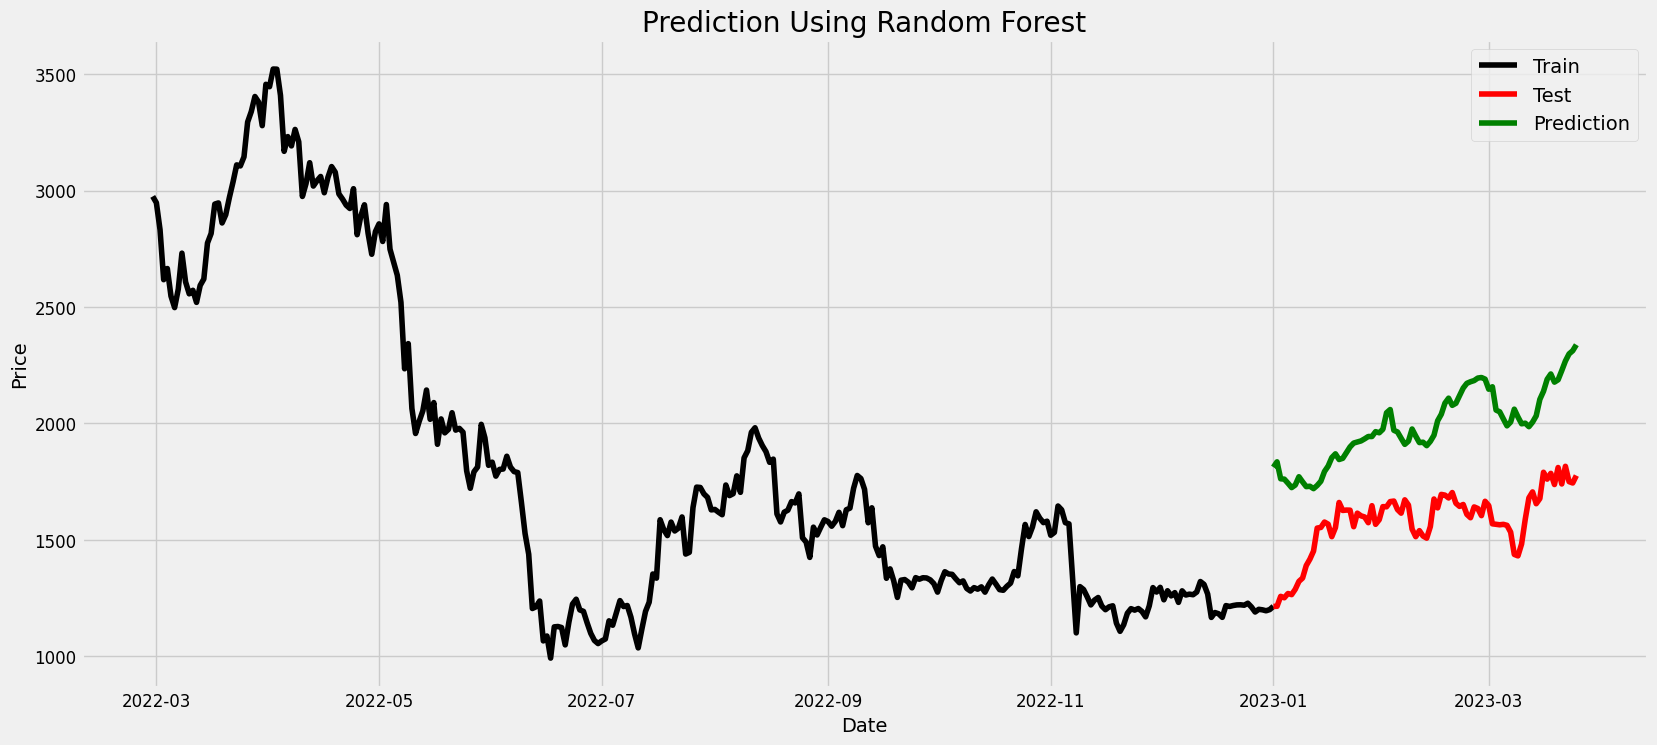

RMSE:  421.4820689457019


In [141]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(trainX,trainY)
 
# predict on the same period
preds = rfmodel.predict(testX)
 
# plot what has been learned
plt.plot(trainData.index, trainData.values,color="black", label='Train')
plt.plot(testData.index, testData.values,color="red", label='Test')
plt.plot(testData.index, preds, color="green",label='Prediction')

plt.ylabel('Price')
plt.xlabel('Date')
plt.title("Prediction Using Random Forest")

plt.legend()
plt.show()




rf_rmse = np.sqrt(mean_squared_error(testData.values, preds))
print("RMSE: ",rf_rmse)

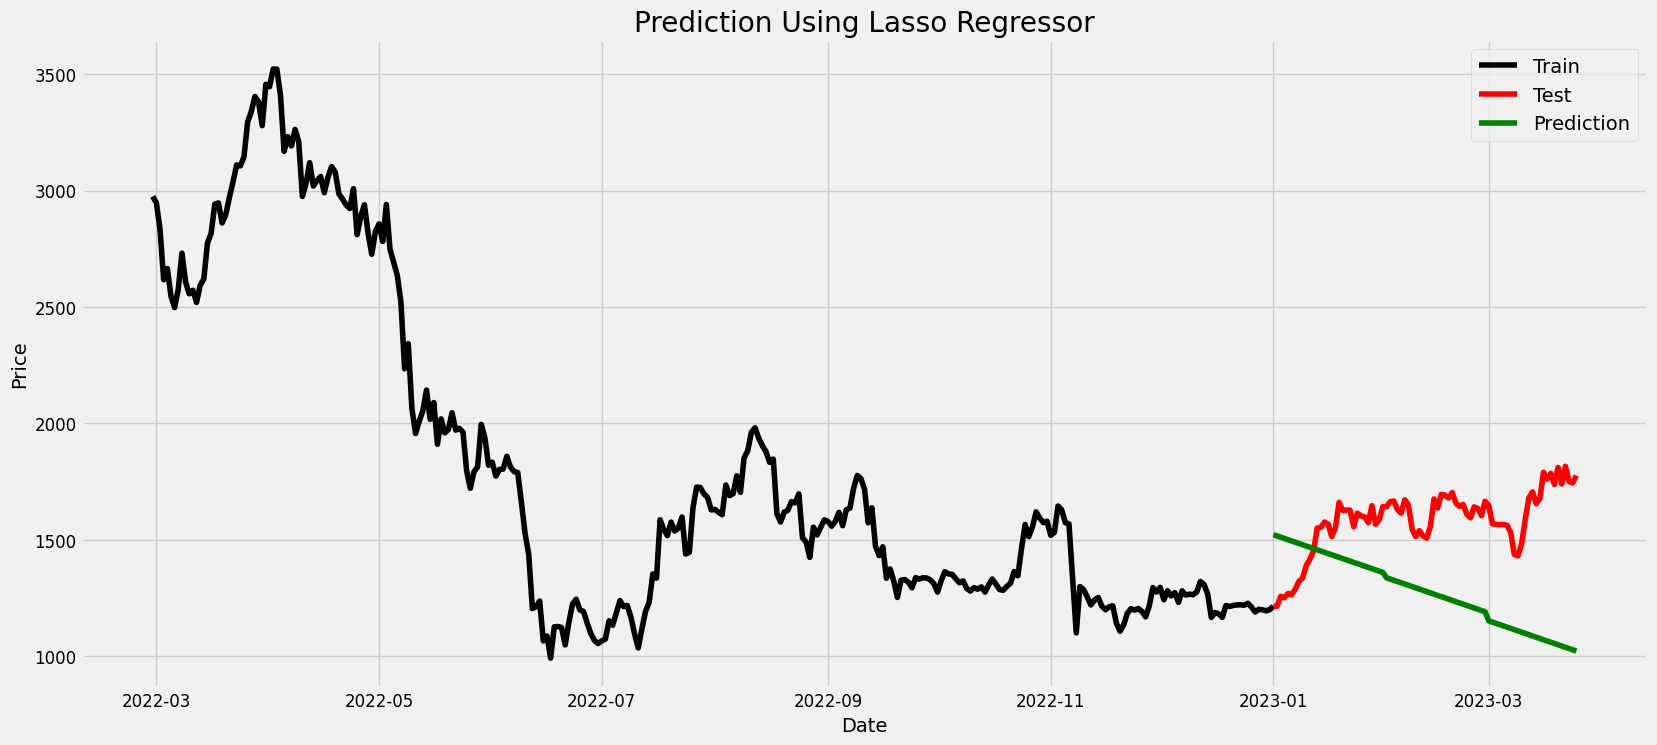

RMSE:  403.16665583054373


In [142]:
from sklearn.linear_model import Lasso
 
# fit the model
lassoModel = Lasso()
lassoModel.fit(trainX,trainY)
 
# predict on the same period
preds = lassoModel.predict(testX)
 
# plot what has been learned
plt.plot(trainData.index, trainData.values,color="black", label='Train')
plt.plot(testData.index, testData.values,color="red", label='Test')
plt.plot(testData.index, preds, color="green",label='Prediction')
plt.legend()
plt.ylabel('Price')
plt.xlabel('Date')
plt.title("Prediction Using Lasso Regressor")

plt.show()
rf_rmse = np.sqrt(mean_squared_error(testData.values, preds))
print("RMSE: ",rf_rmse)

<h3>Question-8 </h3>
Compare all the RMSEs (ARIMA, SARIMA and two regression algorithms) and
discuss which one is better.

<h3> Answer </h3>


The results of the two regression algorithms are as follows:
1- Random Forest Regressor: RMSE =  468
2- Lasso Regressor: RMSE = 403

The RMSE of ARIMA and SARIMA are 256 and 204 respectively. 

The comparison results indicate that the Arima-based and SarimaMax method has a better performance than that of machine learning methods in terms of RMSE. 

```python

<h3>Question-9 </h3>
Generate future dates from April 1st 2022 to June 30th 2022 and predict the price
using SARIMA model (with optimal parameters).

In [143]:
futureX = pd.date_range(start='04/01/2023', end='30/06/2023', freq='D')


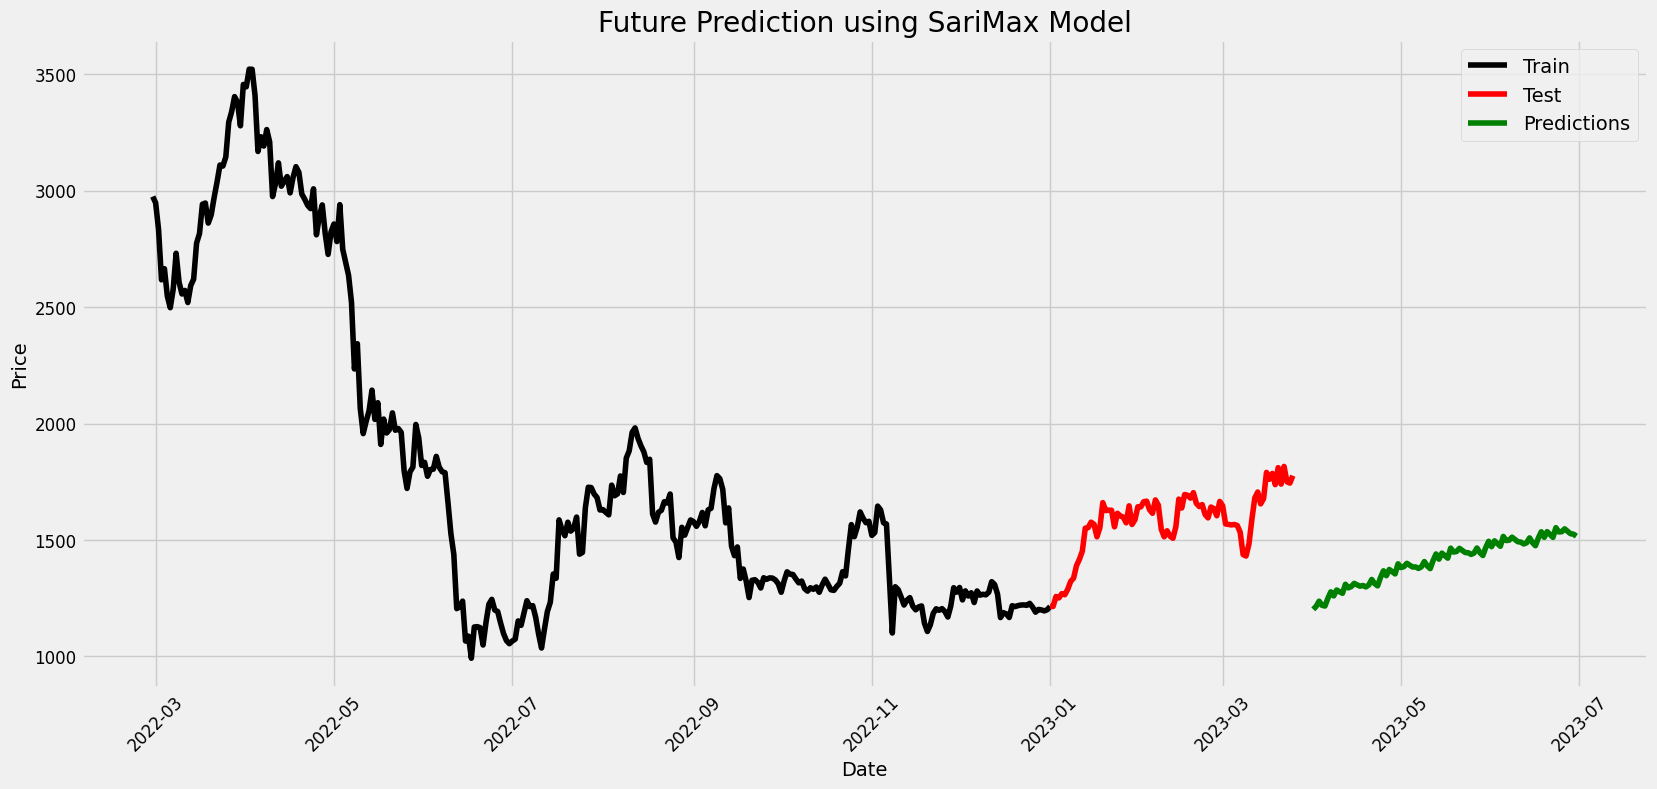

In [144]:
# Calling the SariMax model again with these values
SARIMAXmodelNew = SARIMAX(trainData, order=[0,1,2], seasonal_order=[0,2,2,18])
SARIMAXmodelNew = SARIMAXmodelNew.fit()

y_pred = SARIMAXmodel.get_forecast(len(futureX))
y_pred_df = y_pred.conf_int(alpha=0.45)

y_pred_df["Predictions"] = SARIMAXmodel.predict(
    start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df.index = futureX
y_pred_out = y_pred_df["Predictions"]

plt.plot(trainData, color="black", label='Train')
plt.plot(testData, color="red", label='Test')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Future Prediction using SariMax Model")

plt.plot(y_pred_out, color='green', label='Predictions')
plt.legend()
plt.show()

<h3>Question -10</h3>
Using the same future dates, predict the price using any one ML regression model

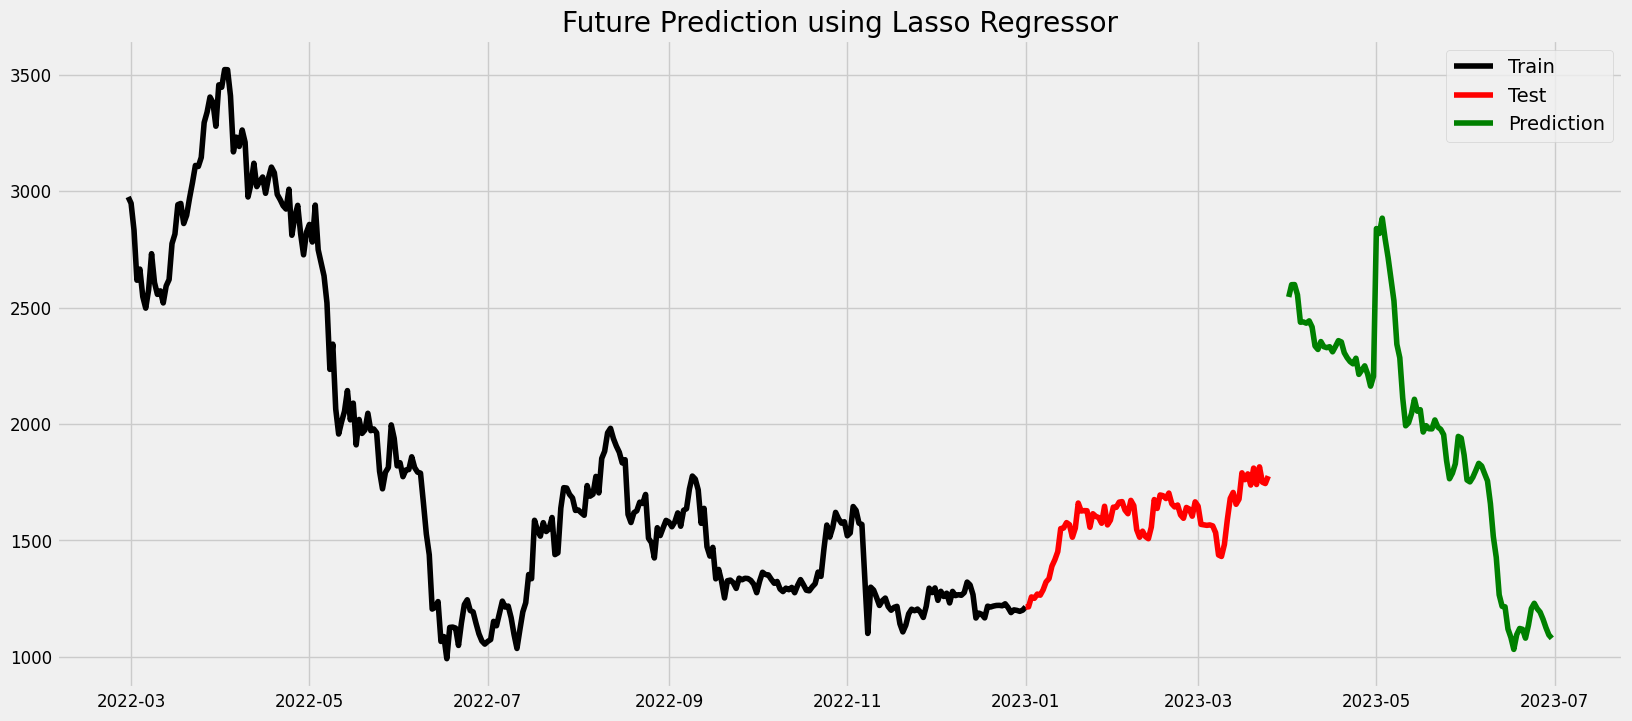

In [145]:
from sklearn.ensemble import RandomForestRegressor
futureX = pd.date_range(start='04/01/2023', end='30/06/2023', freq='D')
tmonths = [x.month for x in futureX]
tyears = [x.year for x in futureX]
tday = [x.day for x in futureX]

# convert into one matrix
testX = np.array([tday, tmonths, tyears]).T

# fit the model
rfmodel = RandomForestRegressor()
rfmodel.fit(trainX, trainY)

# predict on the same period
preds = rfmodel.predict(testX)

# plot what has been learned
plt.plot(trainData.index, trainData.values, color="black", label='Train')
plt.plot(testData.index, testData.values, color="red", label='Test')
plt.plot(futureX, preds, color="green", label='Prediction')
plt.title("Future Prediction using Lasso Regressor")
plt.legend()
plt.show()
#  rf_rmse = n


<h3>Question-11</h3>
Visualize the predictions from 9 and 10 and discuss their differences.

<h3>Answer </h3>
The visualization is above in the code. However there is great difference between the predictions of SARIMA and ML regression model. The predictions of SARIMA are more accurate than that of ML regression model as SARIMA model shows the accurate prediction based on the seasonal trend of the data, whereas ML regression model is not able to predict the seasonal trend of the data. 

```python